In [44]:
from pyDOE2 import *
import pandas as pd
import numpy as np
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [45]:
data_shuffeled = pd.read_csv("results_final.csv")
data = data_shuffeled.copy()
counter = 0
for k in range(3):
    for i in range(30):
        for j in range(5):
            data.iloc[counter] = data_shuffeled.iloc[(30*j + i)+k*150]
            counter += 1
            
training_time = data['training_time']

In [46]:
setup1 = data[:150]
setup2 = data[150:300]
setup3 = data[300:450]

In [56]:
price_standard =  0.194236
price_optimized = 0.2088

standard_price = data['training_time'][:150] / 3600000 * (price_standard)
hybrid_price = data['training_time'][150:300] / 3600000 * (price_standard + price_optimized)/2
optimized_price = data['training_time'][300:450] / 3600000 * (price_optimized)

data['price'] = pd.concat([standard_price, hybrid_price, optimized_price])

In [57]:
means = data.copy()[:90]

for i in range (0, len(data), 5):
    means.iloc[int(i/5)] = data.iloc[i:i+5].mean()
print(means)

setup1_mean = means[:30]
setup2_mean = means[30:60]
setup3_mean = means[60:90]

    Unnamed: 0  Index setup  batch_size  max_epochs  learning_rate  \
0         60.0   60.0   NaN       152.0         3.0          0.010   
1         61.0   61.0   NaN       152.0         3.0          0.010   
2         62.0   62.0   NaN       184.0         4.0          0.070   
3         63.0   63.0   NaN       184.0         4.0          0.070   
4         64.0   64.0   NaN       112.0        17.0          0.005   
..         ...    ...   ...         ...         ...            ...   
85       385.0  385.0   NaN       128.0        27.0          0.020   
86       386.0  386.0   NaN       192.0        18.0          0.010   
87       387.0  387.0   NaN       192.0        18.0          0.010   
88       388.0  388.0   NaN       256.0        12.0          0.015   
89       389.0  389.0   NaN       256.0        12.0          0.015   

    memory_size model  accuracy  training_time     price  
0       12000.0   NaN   0.89074   8.616064e+04  0.004649  
1       12000.0   NaN   0.19320   1.32006

In [133]:
occurences = []
occ = []
bins =['standard', 'hybrid', 'optimized']
for i in range(len(setup1_mean)):
    if setup1_mean['training_time'].iloc[i] < setup2_mean['training_time'].iloc[i] and setup1_mean['training_time'].iloc[i] < setup3_mean['training_time'].iloc[i]:
        occurences.append('standard')
        occ.append(2)
    if setup2_mean['training_time'].iloc[i] < setup1_mean['training_time'].iloc[i] and setup2_mean['training_time'].iloc[i] < setup3_mean['training_time'].iloc[i]:
        occurences.append('hybrid')
        occ.append(0)
    if setup3_mean['training_time'].iloc[i] < setup1_mean['training_time'].iloc[i] and setup3_mean['training_time'].iloc[i] < setup2_mean['training_time'].iloc[i]:
        occurences.append('optimized')
        occ.append(1)
        
optcost = 0
opttime = 0
for i in range(len(occ)):
    if occ[i] == 0:
        optcost += setup2_mean['price'].iloc[i]
        opttime += setup2_mean['training_time'].iloc[i]
    if occ[i] == 1:
        optcost += setup3_mean['price'].iloc[i]
        opttime += setup3_mean['training_time'].iloc[i]
    if occ[i] == 2:
        optcost += setup1_mean['price'].iloc[i]
        opttime += setup1_mean['training_time'].iloc[i]
        



standardcost = setup1_mean['price'].sum()
standardtime = setup1_mean['training_time'].sum()
improvementcoststandard = (optcost-standardcost)/standardcost
improvementtimestandard = (opttime-standardtime)/standardtime

optimizedcost = setup3_mean['price'].sum()
optimizedtime = setup3_mean['training_time'].sum()
improvementcostoptimized = (optcost-optimizedcost)/optimizedcost
improvementtimeoptimized = (opttime-optimizedtime)/optimizedtime



print("Cost improvement standard: " + str(improvementcoststandard))
print("Time improvement standard: " + str(improvementtimestandard))

print("Cost improvement optimized: " + str(improvementcostoptimized))
print("Time improvement optimized: " + str(improvementcostoptimized))

Cost improvement standard: -0.005656376471832931
Time improvement standard: -0.05448012787552318
Cost improvement optimized: -0.050997448325598674
Time improvement optimized: -0.050997448325598674


In [134]:
# MLP told this was optimal
array =[0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0]

optcost = 0
opttime = 0
for i in range(len(array)):
    if array[i] == 0:
        optcost += setup2_mean['price'].iloc[i]
        opttime += setup2_mean['training_time'].iloc[i]
    if array[i] == 1:
        optcost += setup3_mean['price'].iloc[i]
        opttime += setup3_mean['training_time'].iloc[i]
    if array[i] == 2:
        optcost += setup1_mean['price'].iloc[i]
        opttime += setup1_mean['training_time'].iloc[i]
        



standardcost = setup1_mean['price'].sum()
standardtime = setup1_mean['training_time'].sum()
improvementcoststandard = (optcost-standardcost)/standardcost
improvementtimestandard = (opttime-standardtime)/standardtime

optimizedcost = setup3_mean['price'].sum()
optimizedtime = setup3_mean['training_time'].sum()
improvementcostoptimized = (optcost-optimizedcost)/optimizedcost
improvementtimeoptimized = (opttime-optimizedtime)/optimizedtime



print("Cost improvement standard: " + str(improvementcoststandard))
print("Time improvement standard: " + str(improvementtimestandard))

print("Cost improvement optimized: " + str(improvementcostoptimized))
print("Time improvement optimized: " + str(improvementcostoptimized))

    
    
        

Cost improvement standard: 0.00814200615033185
Time improvement standard: -0.03785466369643794
Cost improvement optimized: -0.037828258110498794
Time improvement optimized: -0.037828258110498794


<AxesSubplot:xlabel='accuracy', ylabel='training_time'>

<Figure size 432x288 with 0 Axes>

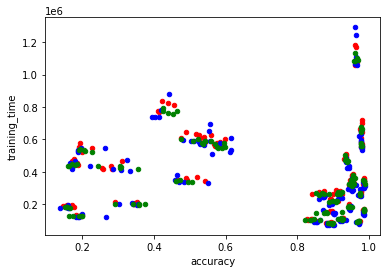

In [135]:
fig1 = plt.figure()
ax=setup1.plot.scatter(x='accuracy', y='training_time', color='r')
setup2.plot.scatter(x='accuracy', y='training_time', color='b', ax=ax)
setup3.plot.scatter(x='accuracy', y='training_time', color='g', ax=ax)